## ${\textbf{Libraries}}$

In [5]:
import numpy as np
import pandas as pd

# We import the sk learn modules we'll need to segment our new data. We'll need scaler, pca and k-means.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# We import pickle in order to be able to load our pickled objects.
import pickle

#We import the necessary libraries for visualization. We set seaborn do be our default.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## ${\textbf{Data Import}}$

In [6]:
# Load data. We read the purchase data csv file.
df_purchase = pd.read_csv('purchase data.csv')

## ${\textbf{Data Exploration}}$

In [7]:
# We use the head method on our data and check for missing values.
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [8]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

Here, no need to impute any missing data points

## ${\textbf{Data Segmentation}}$

### ${\textbf{Import Segmentation Model}}$

In [9]:
# We load our pickled objects in order to segment the purchase data set.
scaler = pickle.load(open('scaler.pickle', 'rb'))

In [10]:
pca = pickle.load(open('pca.pickle', 'rb'))

In [11]:
kmeans_pca = pickle.load(open('pca_kmeans.pickle', 'rb'))

### ${\textbf{Standardization}}$

In [12]:
# We standardize the purchase data in the same way we did the segmentation data, using the standard scaler.
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

### ${\textbf{PCA}}$

In [13]:
# We apply pca on the purchase data and obtain principal components for each row in the table. 
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### ${\textbf{K-means PCA}}$

In [14]:
# Based on the principal components, we use the predict method from pca to segment the purchase data into the four segments.
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [15]:
# We'll be changing the predictors data frame, by adding and changing columns.
# Therefore, we want to keep an original copy.
df_purchase_predictors = df_purchase.copy()

In [16]:
# Add segment information as a new column in our predictors data frame.
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## ${\textbf{Descriptive Analysis by Segments}}$

### ${\textbf{Data Analysis by Customer}}$

In [17]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [18]:
# we group the visits by customer to obtain a visit count for each of them
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [19]:
# we calculate the number of purchase by customers regardless of the brand
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
# set index for joining
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [20]:
# average number of purchases by customer
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [25]:
# we get the segment for each customer (using the mean (sum + divide))
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID') 
df_purchase_descr = temp3.join(temp4)

In [26]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,0
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1


### ${\textbf{Segment Proportions}}$

In [32]:
# we group customers by segment and calculate the proportion
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})

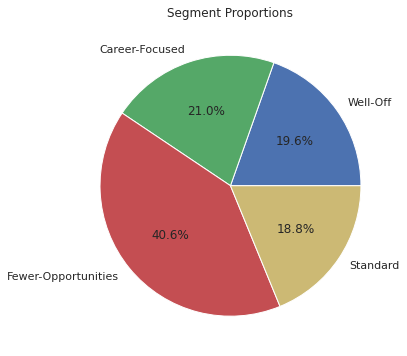

In [66]:
# we plot the segment proportions as a pie chart. 
# we can easily see which is the largest segment and the relative sizes of each segment.
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Well-Off', 'Career-Focused', 'Fewer-Opportunities', 'Standard'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'y'))
plt.title('Segment Proportions');

Our segments are imbalanced in favor of the "Fewer-Opportunities" one

### ${\textbf{Purchase Occasion and Purchase Incidence / Segments}}$

In [36]:
# we calculate the mean by the four segments to help us determine the average customer behaviour in each segment
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,117.295918,34.602041,0.284478
1,124.428571,41.847619,0.294155
2,113.719212,22.768473,0.201751
3,117.531915,23.734043,0.205481


In [37]:
# we calculate the standard deviation by segments to help us determine how homogoneus each of the segments is
segments_std = df_purchase_descr.groupby(['Segment']).std()

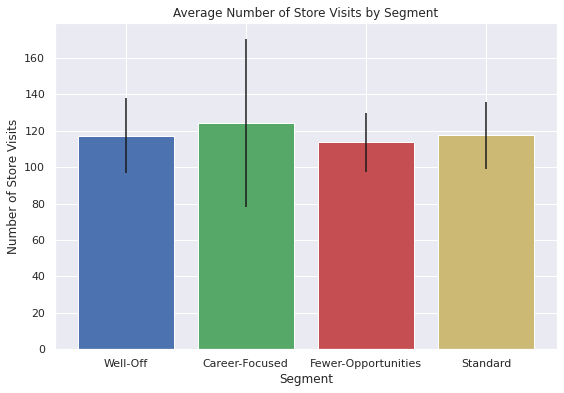

In [67]:
# we plot the average number of store visits for each of the four segments
# we display the standard deviation as a straight line
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Well-Off', 'Career-Focused', 'Fewer-Opportunities', 'Standard'), 
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'y'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment');

Here we can see that the career focused segment stands apart as it has the highest dispersion in term of visits

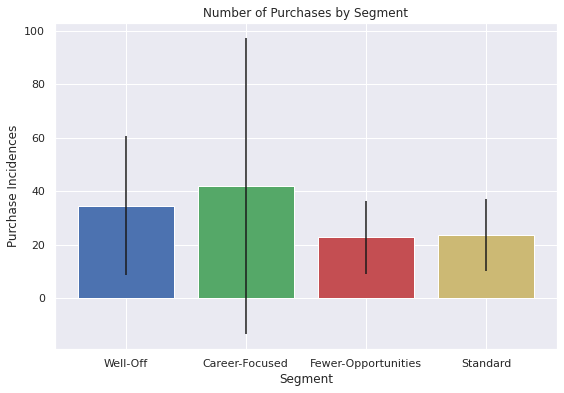

In [68]:
# we display the average number of purchases by segments to help us understand how often each group buys the product
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Well-Off', 'Career-Focused', 'Fewer-Opportunities', 'Standard'), 
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'y'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment');

There again it appears that carrer focused people stand out as they seems to be buying more often than the others. But again the segment seems very heterogeneous regarding this criteria. It might be that a part of the segment buys products very frequently, and another part less so. The most homogenous segment appears to be that of the ‘Fewer-Opportunities’. 

### ${\textbf{Average number of purchases by store visits for each segments}}$

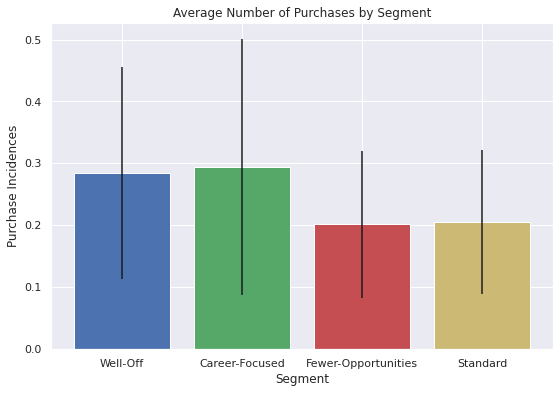

In [69]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('Well-Off', 'Career-Focused', 'Fewer-Opportunities', 'Standard'),
        height = segments_mean['Average_N_Purchases'], 
        yerr = segments_std['Average_N_Purchases'], 
        color = ('b', 'g', 'r', 'y'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment');

### ${\textbf{Brand Choice}}$

In [46]:
# we are only interested in the times a purchase was made.
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [48]:
# making dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001


In [51]:
# we calculate the proportion of each brand a customer actually buys
temp = brand_dummies.groupby(['ID'], as_index = True).mean()
temp.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.0,0.222222,0.222222,2
200000002,0.000000,0.090909,0.0,0.909091,0.000000,0
200000003,0.000000,0.800000,0.0,0.000000,0.200000,2
200000004,0.000000,0.090909,0.0,0.000000,0.909091,2
200000005,0.000000,0.000000,0.0,0.000000,1.000000,1


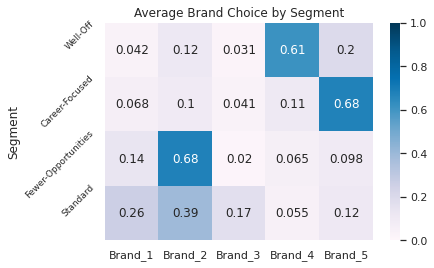

In [56]:
# we calculate the proportion of each brand for each segment and display it graphically
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Well-Off', 'Career-Focused', 'Fewer-Opportunities', 'Standard'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment');

As we can see, the segmentation seems effective in regard to the brand choice, except for the 'Standard' cluster

### ${\textbf{Revenue}}$

In [75]:
# Compute the revenue generate for each brand
# For each entry where Brand i was purchased, we multiply the price of the brand
# for that particular day by the quantity of the product purchased.
segments_brand_revenue = pd.DataFrame()
for i in range(5):
    temp = df_purchase_predictors[df_purchase_predictors['Brand'] == i+1]
    temp.loc[:, 'Revenue Brand ' +
             str(i+1)] = temp['Price_' + str(i+1)] * temp['Quantity']
    segments_brand_revenue[['Segment', 'Revenue Brand ' + str(i+1)]] = temp[[
        'Segment', 'Revenue Brand ' + str(i+1)]].groupby(['Segment'], as_index=False).sum()

segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'])

segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map(
    {0: 'Well-Off', 1: 'Career-Focused', 2: 'Fewer-Opportunities', 3: 'Standard'})

In [76]:
# we include the segment proportions to see the size of the segment compared to the revenue they bring
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Career-Focused,664.94,1144.38,650.32,2301.70,20251.43,25012.77,0.210
Fewer-Opportunities,2409.39,15177.84,730.68,1924.09,2380.59,22622.59,0.406
Standard,2531.85,4147.86,3909.17,628.74,1479.29,12696.91,0.188
